# Goal

* metagenome assembly of combined reads from HiSeq runs:
  * 0083
  * 0091


# Var

In [141]:
work_dir = '/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/'

run83_dir = '/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/'
run91_dir = '/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0091/LLMGQC/'

run83_samp_file = file.path(run83_dir, 'final', 'samples.txt')
run91_samp_file = file.path(run91_dir, 'final', 'samples.txt')

run83_report_file = file.path(run83_dir, 'reports/multiqc_report_filter/multiqc_data/', 'multiqc_general_stats.txt')
run91_report_file = file.path(run91_dir, 'reports/multiqc_report_filter/multiqc_data/', 'multiqc_general_stats.txt')

# Init

In [75]:
library(dplyr)
library(tidyr)
library(ggplot2)
source('/ebio/abt3_projects/vadinCA11/code/init.R')

In [142]:
make_dir(work_dir)

Created directory: /ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/ 


# Load

## Sample files

In [120]:
run83_samp = read.delim(run83_samp_file, sep='\t') %>%
    mutate(Sample = gsub('^([0-9]+)', 'ID\\1', Sample))
run83_samp %>% status

[1] 131   3


Sample,Read1,Read2
ID50491,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/50491/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/50491/R2_dedup_qual_filt.fq.gz
ID1171,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/1171/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/1171/R2_dedup_qual_filt.fq.gz
ID32031,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/32031/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/32031/R2_dedup_qual_filt.fq.gz


In [121]:
run91_samp = read.delim(run91_samp_file, sep='\t') %>%
    mutate(Sample = gsub('^([0-9]+)', 'ID\\1', Sample))
run91_samp %>% status

[1] 131   3


Sample,Read1,Read2
ID1014299,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0091/LLMGQC/final/1014299/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0091/LLMGQC/final/1014299/R2_dedup_qual_filt.fq.gz
ID1014313,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0091/LLMGQC/final/1014313/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0091/LLMGQC/final/1014313/R2_dedup_qual_filt.fq.gz
ID1019011,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0091/LLMGQC/final/1019011/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0091/LLMGQC/final/1019011/R2_dedup_qual_filt.fq.gz


In [122]:
# checking overlap of samples
setdiff(run83_samp$Sample, run91_samp$Sample) %>% print
setdiff(run91_samp$Sample, run83_samp$Sample) %>% print

character(0)
character(0)


## fastQC reports

In [123]:
run83_report = read.delim(run83_report_file, sep='\t') %>%
    mutate(SampleID = gsub('\\|.+', '', Sample),
           SampleID = gsub('^([0-9]+)', 'ID\\1', SampleID),
           SampleID = gsub(' ', '', SampleID),
           RunID = 'Run0083') 
run83_report %>% status

[1] 262   8


Sample,FastQC_mqc.generalstats.avg_sequence_length,FastQC_mqc.generalstats.percent_fails,FastQC_mqc.generalstats.percent_gc,FastQC_mqc.generalstats.total_sequences,FastQC_mqc.generalstats.percent_duplicates,SampleID,RunID
1006624 | fastqc_per_sample | R1_dedup_qual_filt,149.1878,9.090909,45,3481090,7.372846,ID1006624,Run0083
1006624 | fastqc_per_sample | R2_dedup_qual_filt,148.9133,9.090909,45,3481090,7.327216,ID1006624,Run0083
1006625 | fastqc_per_sample | R1_dedup_qual_filt,148.9882,9.090909,46,2126869,6.647899,ID1006625,Run0083


In [124]:
run91_report = read.delim(run91_report_file, sep='\t') %>%
    mutate(SampleID = gsub('\\|.+', '', Sample),
           SampleID = gsub('^([0-9]+)', 'ID\\1', SampleID),
           SampleID = gsub(' ', '', SampleID),
           RunID = 'Run0091')
run91_report %>% status

[1] 262   8


Sample,FastQC_mqc.generalstats.total_sequences,FastQC_mqc.generalstats.percent_gc,FastQC_mqc.generalstats.percent_fails,FastQC_mqc.generalstats.percent_duplicates,FastQC_mqc.generalstats.avg_sequence_length,SampleID,RunID
1006624 | fastqc_per_sample | R1_dedup_qual_filt,11139372,46,9.090909,15.02083,149.1375,ID1006624,Run0091
1006624 | fastqc_per_sample | R2_dedup_qual_filt,11139372,46,9.090909,15.31624,148.8655,ID1006624,Run0091
1006625 | fastqc_per_sample | R1_dedup_qual_filt,6763718,46,9.090909,14.94901,148.9407,ID1006625,Run0091


## Format

In [125]:
report = rbind(run83_report, run91_report) %>%
    mutate(SampleID = gsub('^([0-9]+)', 'ID\\1', SampleID))
colnames(report) = gsub('mqc\\.generalstats\\.', '', colnames(report))
report %>% status

[1] 524   8


Sample,FastQC_avg_sequence_length,FastQC_percent_fails,FastQC_percent_gc,FastQC_total_sequences,FastQC_percent_duplicates,SampleID,RunID
1006624 | fastqc_per_sample | R1_dedup_qual_filt,149.1878,9.090909,45,3481090,7.372846,ID1006624,Run0083
1006624 | fastqc_per_sample | R2_dedup_qual_filt,148.9133,9.090909,45,3481090,7.327216,ID1006624,Run0083
1006625 | fastqc_per_sample | R1_dedup_qual_filt,148.9882,9.090909,46,2126869,6.647899,ID1006625,Run0083


In [126]:
# checking number of samples
run83_report$SampleID %>% unique %>% length %>% print
run91_report$SampleID %>% unique %>% length %>% print
report$SampleID %>% unique %>% length %>% print

[1] 131
[1] 131
[1] 131


In [127]:
setdiff(report$SampleID, run83_report$SampleID) %>% print
setdiff(report$SampleID, run91_report$SampleID) %>% print
cat('----\n')
setdiff(run83_report$SampleID, run91_report$SampleID) %>% print
setdiff(run91_report$SampleID, run83_report$SampleID) %>% print

character(0)
character(0)
----
character(0)
character(0)


## Filter

In [128]:
# filtering out controls
is_control = c('mock', 'water') 
report = report %>%
    filter(!SampleID %in% is_control)
report %>% status

[1] 516   8


Sample,FastQC_avg_sequence_length,FastQC_percent_fails,FastQC_percent_gc,FastQC_total_sequences,FastQC_percent_duplicates,SampleID,RunID
1006624 | fastqc_per_sample | R1_dedup_qual_filt,149.1878,9.090909,45,3481090,7.372846,ID1006624,Run0083
1006624 | fastqc_per_sample | R2_dedup_qual_filt,148.9133,9.090909,45,3481090,7.327216,ID1006624,Run0083
1006625 | fastqc_per_sample | R1_dedup_qual_filt,148.9882,9.090909,46,2126869,6.647899,ID1006625,Run0083


# Summary

## Total sequence

In [129]:
total_bp = report %>% 
    mutate(bp = FastQC_total_sequences * FastQC_avg_sequence_length) %>%
    .$bp %>% sum

cat('Total bp of sequence:', total_bp, '\n')

Total bp of sequence: 3.77235e+11 


In [130]:
cat('Total Mbp of sequence:', total_bp / 1e6, '\n')

Total Mbp of sequence: 377235 


In [131]:
cat('Total Tbp of sequence:', total_bp / 1e12, '\n')

Total Tbp of sequence: 0.377235 


## Total post-QC reads

In [147]:
x = report$FastQC_total_sequences %>% sum
cat('Number of post-QC paired-end reads:', x / 2, '\n')

Number of post-QC paired-end reads: 1266473914 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


File written: /ebio/abt3_projects/vadinCA11/notebooks/metagenome/assembly/HiSeqRuns83-91/.figures/fig-18998139450035f1694efed0.pdf 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


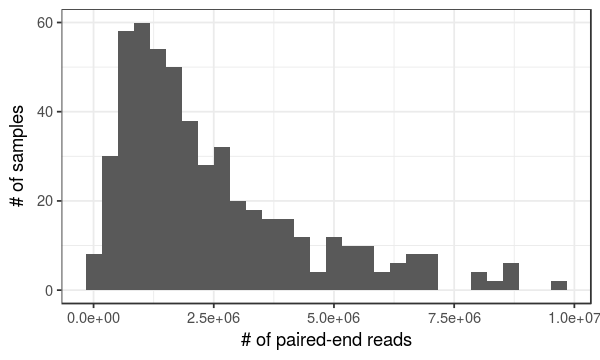

In [132]:
p = ggplot(report, aes(FastQC_total_sequences / 2)) +
    geom_histogram() +
    labs(x='# of paired-end reads', y='# of samples') +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3)
plot_write(p)

# Creating samples file for assembly

In [133]:
samples = rbind(run83_samp %>% mutate(RunID = 83), 
                run91_samp %>% mutate(RunID = 91))
samples %>% status

[1] 262   4


Sample,Read1,Read2,RunID
ID50491,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/50491/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/50491/R2_dedup_qual_filt.fq.gz,83
ID1171,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/1171/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/1171/R2_dedup_qual_filt.fq.gz,83
ID32031,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/32031/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/32031/R2_dedup_qual_filt.fq.gz,83


In [134]:
# should be 2 samples (1 per run)
samples$Sample %>% table %>% as.vector %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

In [137]:
# overlap of sample IDs
setdiff(report$SampleID, samples$Sample) %>% print
setdiff(samples$Sample, report$SampleID) %>% print

character(0)
[1] "water" "mock" 


In [139]:
samples = samples %>%
    semi_join(report, c('Sample'='SampleID'))

samples$Sample %>% table %>% unique %>% as.vector %>% summary %>% print
samples %>% status

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 
[1] 258   4


Sample,Read1,Read2,RunID
ID1006624,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/1006624/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/1006624/R2_dedup_qual_filt.fq.gz,83
ID1006624,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0091/LLMGQC/final/1006624/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0091/LLMGQC/final/1006624/R2_dedup_qual_filt.fq.gz,91
ID1006625,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/1006625/R1_dedup_qual_filt.fq.gz,/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRun0083/LLMGQC/final/1006625/R2_dedup_qual_filt.fq.gz,83


## Writing samples file

In [144]:
out_file = file.path(work_dir, 'samples.txt')
write.table(samples, file=out_file, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', out_file, '\n')

File written: /ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91//samples.txt 


# Assessed memory needed

Used `est_norm_mem.py` to estimate the memory needed

All samples combined: 

```
Sample	kmers	mem_Gb
all	41290793438	496
```

Each sample (min/max):
```
min = 4
max = 18
```

# LLMGA run

Ran `llmga` from command line (easier for documentation). Process:

* cloned llmga repo
  * `git clone git@gitlab.tuebingen.mpg.de:leylabmpi/llmga.git`
  * version: 0.1.1
* created config:
  * `config_HiSeqRun83-91.yaml`
* ran `llmga`
  * `screen -L -S llmga_va ./snakemake_sge.sh config_HiSeqRun83-91.yaml cluster.json $HOME/tmp/LLMGA/SGE_log 20`

# sessionInfo

In [94]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_2.2.1 tidyr_0.6.1   dplyr_0.5.0  

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.13     magrittr_1.5     munsell_0.4.3    uuid_0.1-2      
 [5] colorspace_1.3-2 R6_2.2.0         stringr_1.2.0    plyr_1.8.4      
 [9] tools_3.3.2      grid_3.3.2       gtable_0.2.0     DBI_0.6-1       
[13] lazyeval_0.2.0   assertthat_0.1   digest_0.6.12    tibble_1.2      
[17] crayon_1.3.2     IRdisp